In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("diabetes_modified.csv")

In [3]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0     98.0           58.0           33.0    190.0  34.0   
1          2.0    112.0           75.0           32.0      NaN  35.7   
2          2.0    108.0           64.0            0.0      0.0  30.8   
3          8.0    107.0           80.0            0.0      0.0  24.6   
4          7.0    136.0            NaN            0.0      0.0  29.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                       NaN  43.0      0.0  
1                     0.148  21.0      0.0  
2                     0.158  21.0      0.0  
3                     0.856  34.0      0.0  
4                     0.210  50.0      0.0  


In [4]:
print("Dataset Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               482 non-null    float64
 1   Glucose                   478 non-null    float64
 2   BloodPressure             470 non-null    float64
 3   SkinThickness             469 non-null    float64
 4   Insulin                   477 non-null    float64
 5   BMI                       481 non-null    float64
 6   DiabetesPedigreeFunction  473 non-null    float64
 7   Age                       473 non-null    float64
 8   Outcome                   472 non-null    float64
dtypes: float64(9)
memory usage: 35.3 KB
Dataset Info:
 None


In [5]:
# Step 1: Data Cleaning
# Check for duplicates
df = df.drop_duplicates()

In [6]:
# Identify numerical columns
num_cols = df.select_dtypes(include=["number"]).columns

In [7]:
# Step 2: Handling Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before imputation:\n", missing_values)

Missing values before imputation:
 Pregnancies                 18
Glucose                     22
BloodPressure               30
SkinThickness               31
Insulin                     23
BMI                         19
DiabetesPedigreeFunction    27
Age                         27
Outcome                     28
dtype: int64


In [ ]:
# Impute missing values
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)  # Mean for numerical columns

# For categorical columns, use mode
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Mode for categorical columns

In [9]:
print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
# Step 3: Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.000000     500.000000     500.000000  500.000000   
mean      3.838174  120.943515      68.638298      20.019190   78.706499   
std       3.369490   32.017889      20.145289      15.796351  113.324024   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000  100.000000      64.000000       0.000000    0.000000   
50%       3.000000  119.000000      70.000000      20.019190   39.000000   
75%       6.000000  141.000000      78.000000      32.000000  117.000000   
max      15.000000  197.000000     114.000000      99.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  500.000000                500.000000  500.000000  500.000000  
mean    31.956965                  0.473846   33.596195    0.343220  
std      8.120083                  0.324335   11.521860    0.461761  
min      0.00

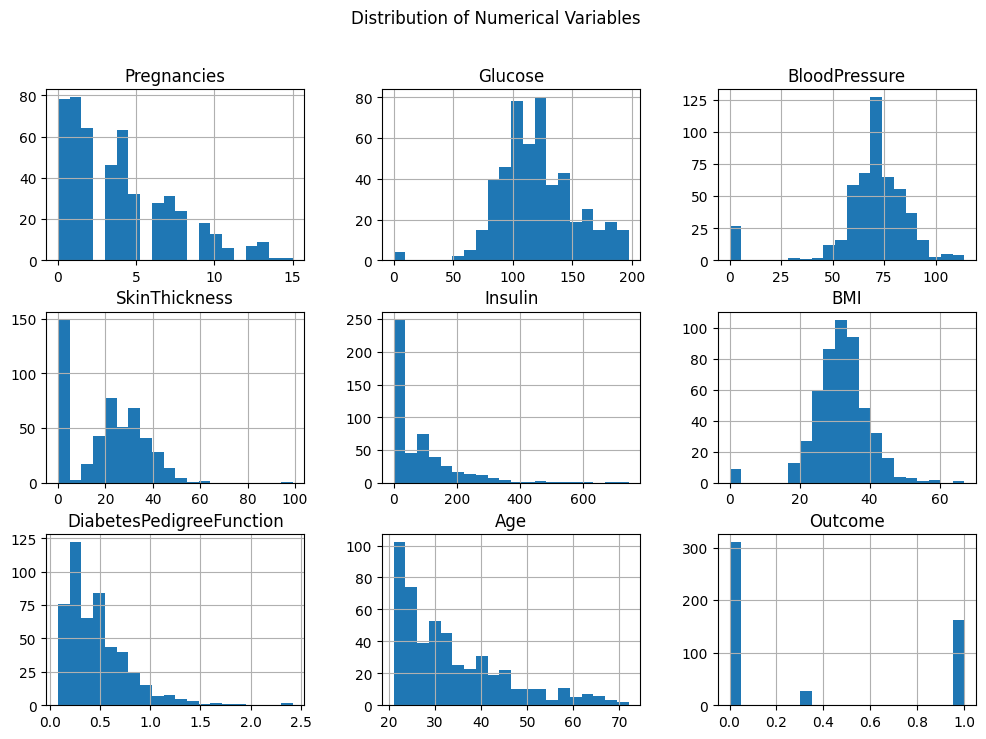

In [12]:
# Histograms for numerical columns
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Numerical Variables")
plt.show()

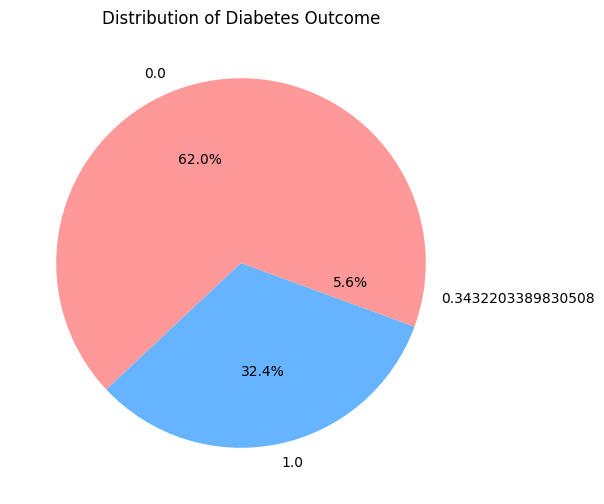

In [19]:
# Pie Chart for the 'Outcome' column
plt.figure(figsize=(6,6))
outcome_counts = df['Outcome'].value_counts()
outcome_labels = outcome_counts.index.astype(str)  # Convert labels to string
outcome_counts.plot.pie(autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"], labels=outcome_labels)
plt.title("Distribution of Diabetes Outcome")
plt.ylabel("")
plt.show()

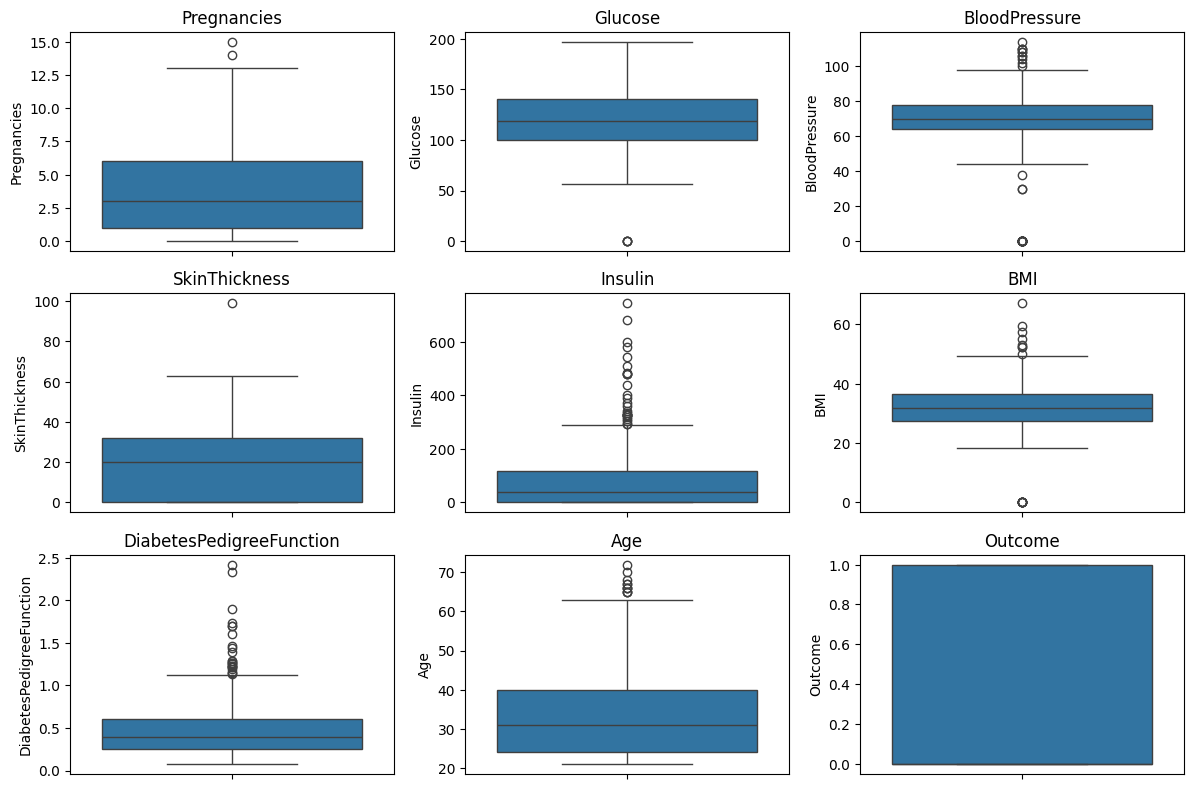

In [13]:
# Boxplots to detect outliers
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

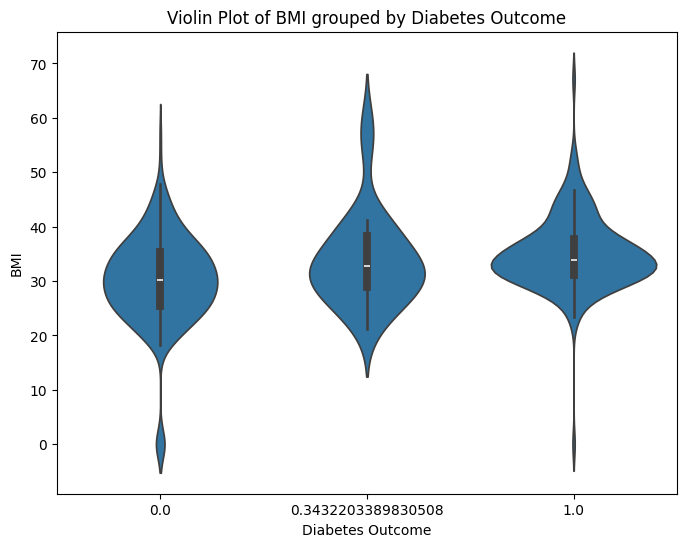

In [21]:
# Violin Plot for 'BMI' grouped by 'Outcome'
plt.figure(figsize=(8,6))
sns.violinplot(x=df['Outcome'].astype(str), y=df['BMI'])
plt.xlabel("Diabetes Outcome")
plt.ylabel("BMI")
plt.title("Violin Plot of BMI grouped by Diabetes Outcome")
plt.show()


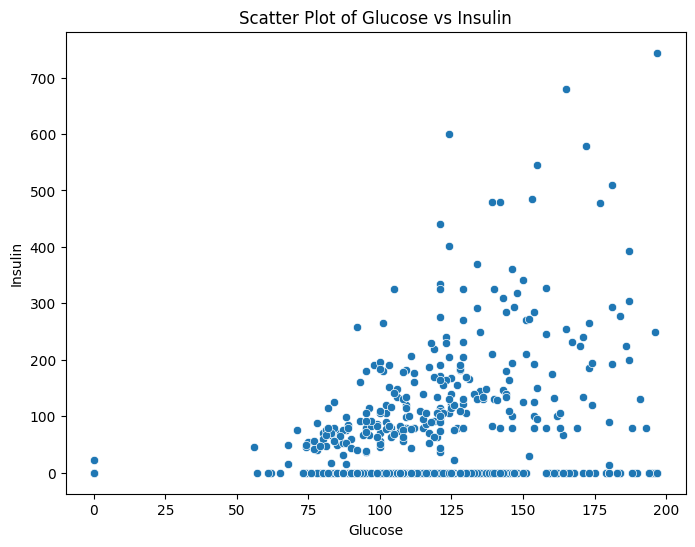

In [20]:
# Scatter Plot between 'Glucose' and 'Insulin'
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Glucose'], y=df['Insulin'])
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Scatter Plot of Glucose vs Insulin")
plt.show()

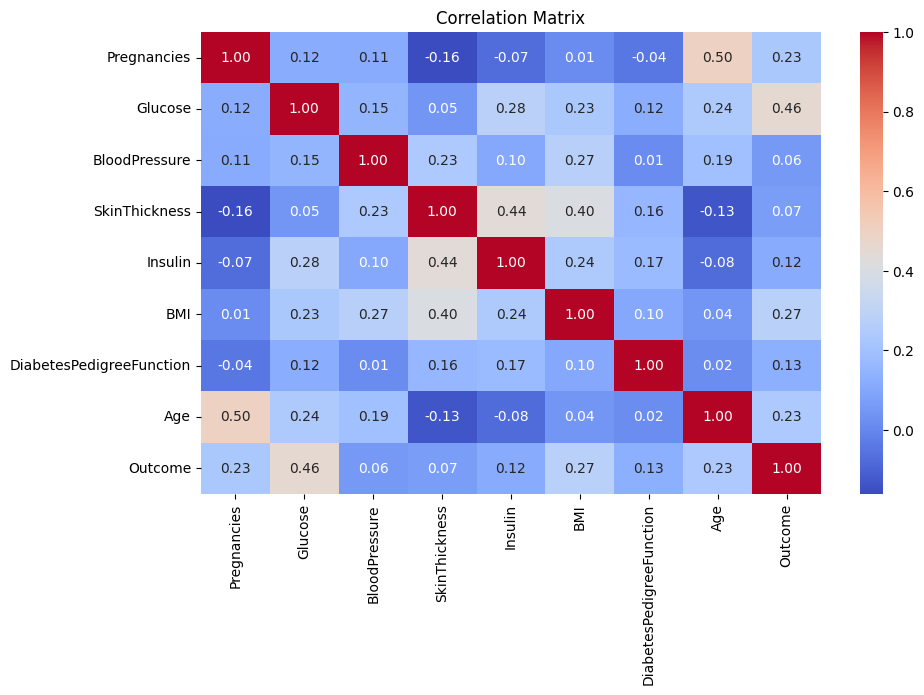

In [14]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

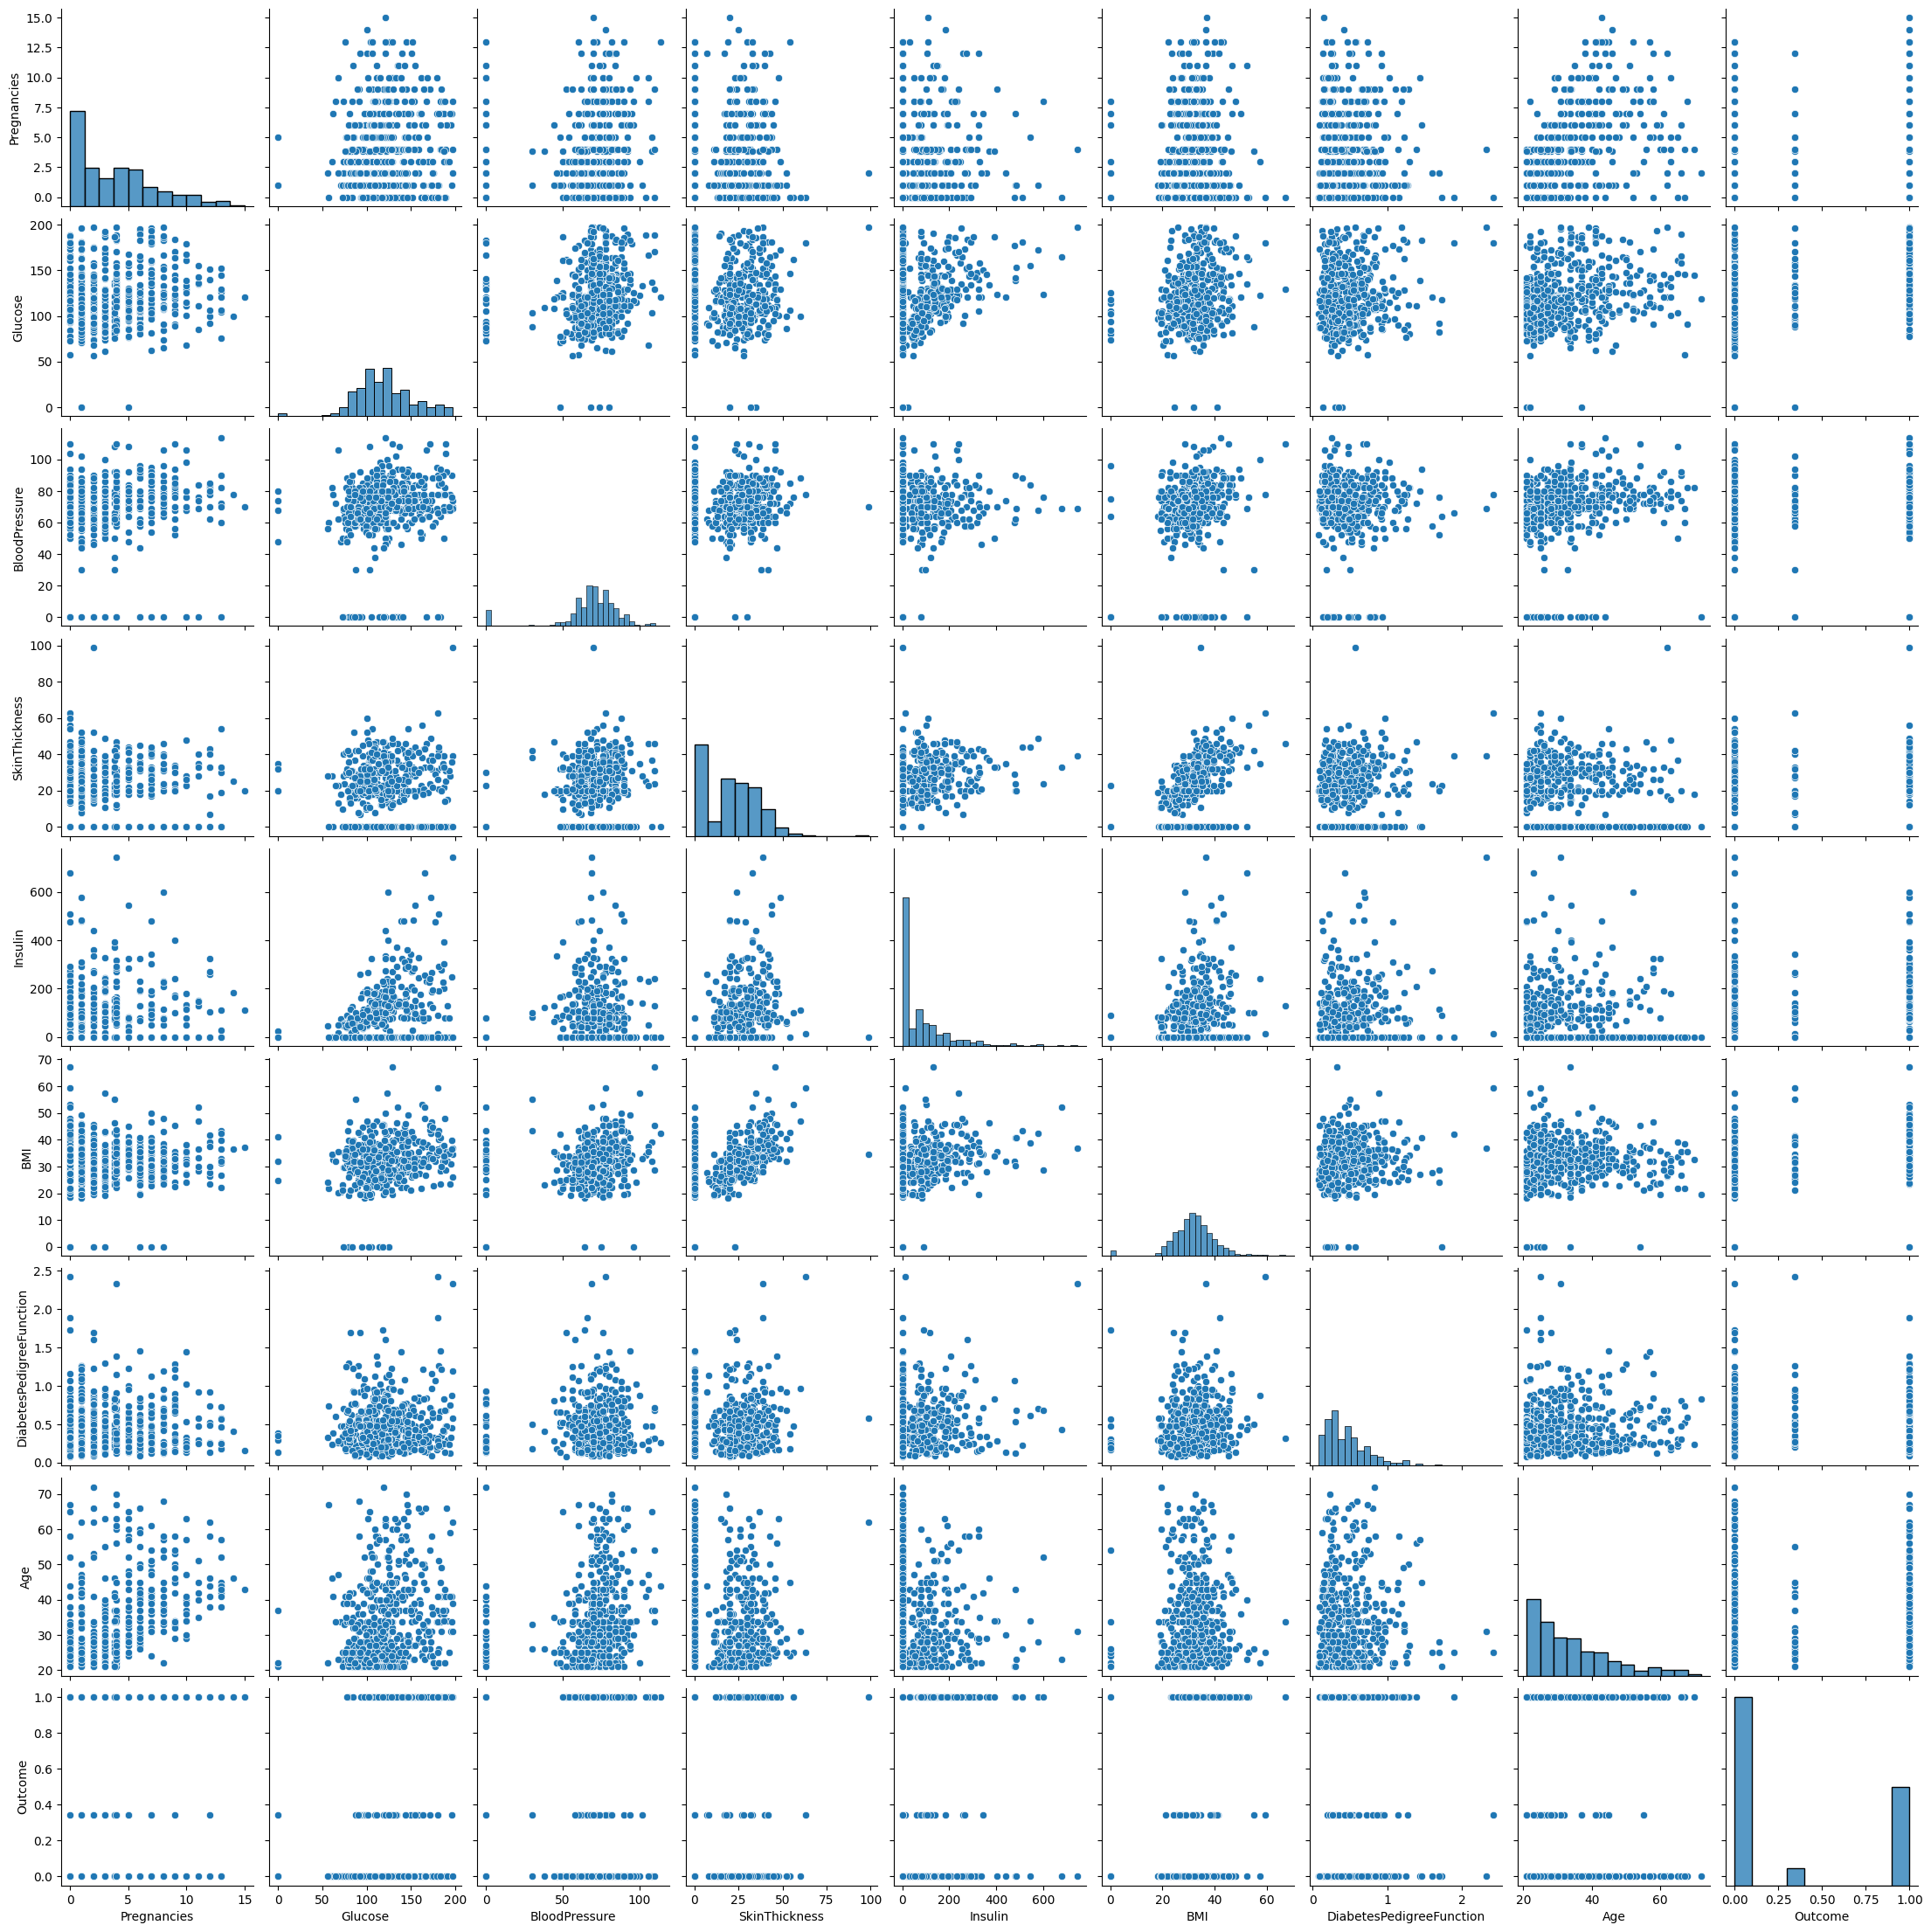

In [15]:
# Pairplot to visualize relationships
sns.pairplot(df[num_cols])
plt.show()